# Wilfire Prediction Project

## Visualize Dataset

In [39]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder, StandardScaler
import pandas as pd
import calendar
import seaborn as sns

In [40]:
# Import Dataset
uci = pd.read_csv("forestfires.csv")

In [41]:
uci

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


In [42]:
# Convert Month/Day columns to numerical features
uci['month'] = uci['month'].apply(lambda x: list(calendar.month_abbr).index(x.capitalize()))
uci['day'] = uci['day'].apply(lambda x: list(calendar.day_abbr).index(x.capitalize()) + 1)


#Scale our numerical data
continuous = ['X', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH',
       'wind', 'rain', 'area']
uci[continuous] = StandardScaler().fit_transform(uci[continuous])

print(uci.to_numpy())

[[ 1.00831277e+00  5.00000000e+00  3.00000000e+00 ...  1.49861442e+00
  -7.32683096e-02 -2.02019788e-01]
 [ 1.00831277e+00  4.00000000e+00  1.00000000e+01 ... -1.74175564e+00
  -7.32683096e-02 -2.02019788e-01]
 [ 1.00831277e+00  4.00000000e+00  1.00000000e+01 ... -1.51828184e+00
  -7.32683096e-02 -2.02019788e-01]
 ...
 [ 1.00831277e+00  4.00000000e+00  8.00000000e+00 ...  1.49861442e+00
  -7.32683096e-02 -2.65321583e-02]
 [-1.58736044e+00  4.00000000e+00  8.00000000e+00 ... -9.83371156e-03
  -7.32683096e-02 -2.02019788e-01]
 [ 5.75700572e-01  3.00000000e+00  1.10000000e+01 ...  2.69508534e-01
  -7.32683096e-02 -2.02019788e-01]]


In [43]:
uci

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,1.008313,5,3,5,-0.805959,-1.323326,-1.830477,-0.860946,-1.842640,0.411724,1.498614,-0.073268,-0.202020
1,1.008313,4,10,2,-0.008102,-1.179541,0.488891,-0.509688,-0.153278,-0.692456,-1.741756,-0.073268,-0.202020
2,1.008313,4,10,6,-0.008102,-1.049822,0.560715,-0.509688,-0.739383,-0.692456,-1.518282,-0.073268,-0.202020
3,1.440925,6,3,5,0.191362,-1.212361,-1.898266,-0.004756,-1.825402,3.233519,-0.009834,0.603155,-0.202020
4,1.440925,6,3,7,-0.243833,-0.931043,-1.798600,0.126966,-1.291012,3.356206,-1.238940,-0.073268,-0.202020
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,-0.289524,3,8,7,-1.640083,-0.846648,0.474768,-1.563460,1.536084,-0.753800,-0.736124,-0.073268,-0.100753
513,-1.154748,4,8,7,-1.640083,-0.846648,0.474768,-1.563460,0.519019,1.638592,0.995798,-0.073268,0.651674
514,1.008313,4,8,7,-1.640083,-0.846648,0.474768,-1.563460,0.398350,1.577248,1.498614,-0.073268,-0.026532
515,-1.587360,4,8,6,0.680957,0.549003,0.269382,0.500176,1.156839,-0.140366,-0.009834,-0.073268,-0.202020


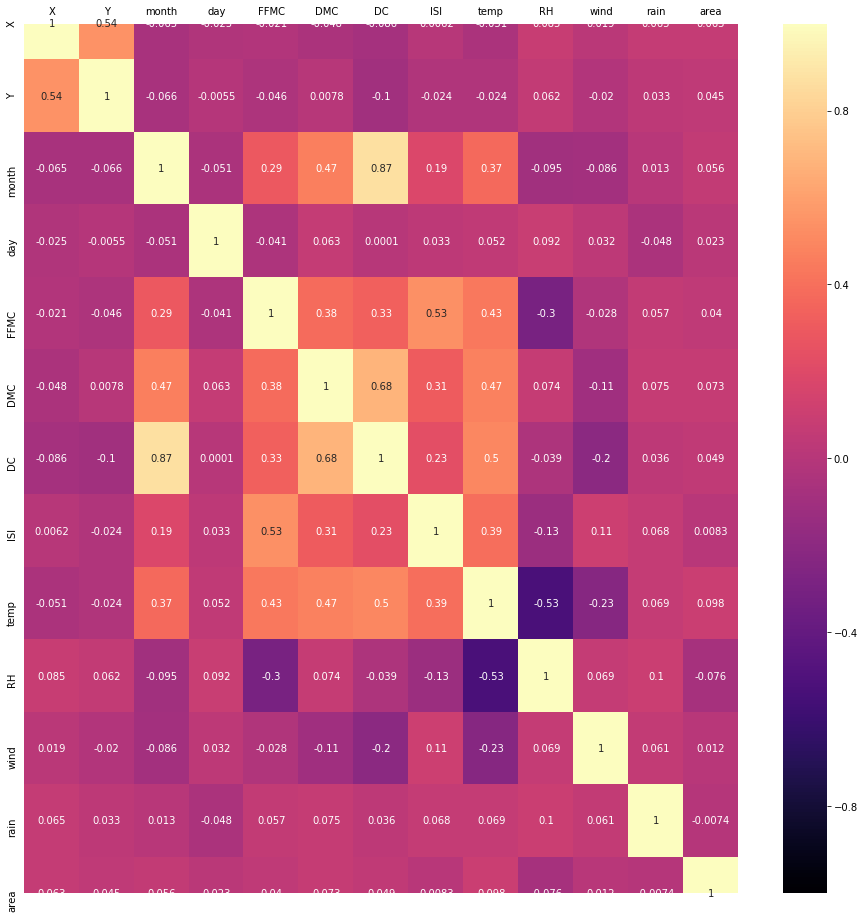

In [44]:
# Plots correlation matrix between features in UCI dataset
plt.figure(figsize=(16, 16))
ax = sns.heatmap(uci.corr(), annot=True, fmt='.2g', vmin=-1, vmax=1, center=0, cmap='magma')
ax.tick_params(axis='both', which='both', labelsize=10, labelbottom = False, left=False, bottom=False, top = False, labeltop=True)

In [45]:
print(uci["Y"].unique())

[5 4 6 3 2 9 8]


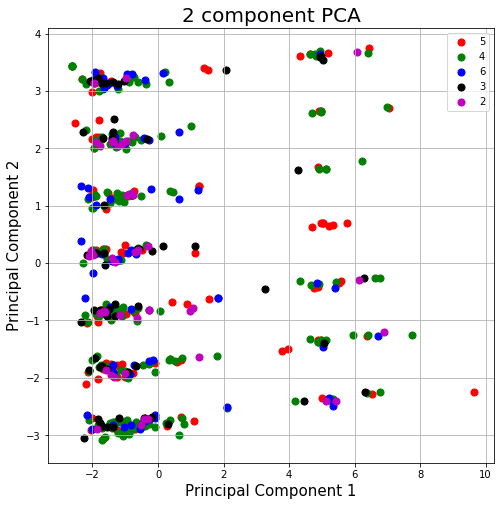

In [46]:
targets = uci["Y"].unique()
X = uci.drop(columns=['Y'])
colors = ['r', 'g', 'b', 'k', 'm']
#project to 2D space so we can visualize it
pca = PCA(n_components = 2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, uci['Y']], axis = 1)

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Y'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()